In [3]:
import os
os.chdir('C:/Users/HP/Desktop/Datasets')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

df = pd.read_csv('9HR-Employee-Attrition.csv')
df['Attrition'].replace(to_replace = 'Yes',value = 1)
df['Attrition'].replace(to_replace = 'No',value = -1)
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


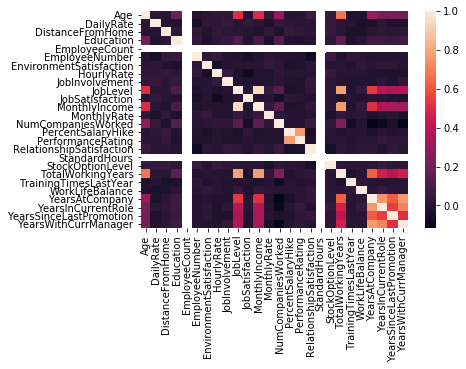

In [4]:
corr = df.corr()
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns)

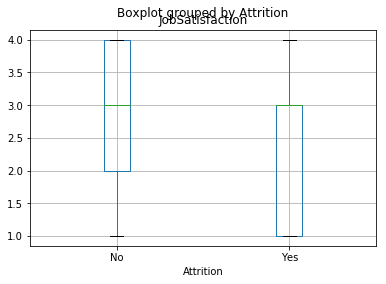

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df.boxplot(column = 'JobSatisfaction',by = 'Attrition')

In [6]:
for x in df.columns:
    print(df[x].value_counts())

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
691     6
1082    5
329     5
1329    5
530     5
408     5
715     4
589     4
906     4
350     4
827     4
1146    4
1283    4
829     4
688     4
1125    4
430     4
465     4
575     4
147     4
217     4
933     4
117     4
427     4
1490    4
977     4
921     4
1157    4
1469    4
950     4
       ..
862     1
854     1
931     1
848     1
845     1
841     1
840     1
835     1
830     1
828     1
880     1
88

In [7]:
df.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [8]:
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()
lm.fit(df['OverTime'])
df['OverTime'] = lm.transform(df['OverTime'])
print(df['OverTime'].value_counts())

0    1054
1     416
Name: OverTime, dtype: int64


In [10]:
lm1 = LabelEncoder()
lm1.fit(df['Attrition'])
df['Attrition'] = lm1.transform(df['Attrition'])
print(df['Attrition'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


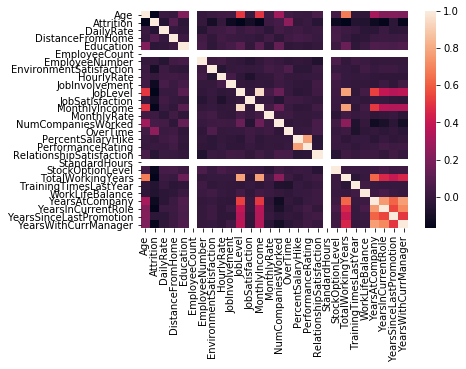

In [11]:
corr = df.corr()
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns)

In [12]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter = 100,C = 10,random_state = 0)
X = df[['Age','JobLevel','JobSatisfaction','OverTime','YearsInCurrentRole']].values
y = df['Attrition'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8486394557823129


E:\PYTHON_ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


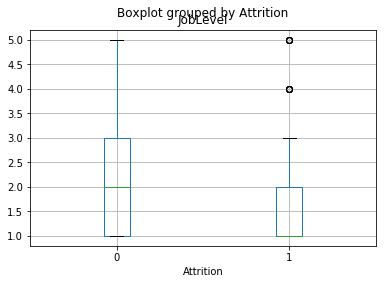

In [13]:
df.boxplot(column = 'JobLevel',by = 'Attrition')

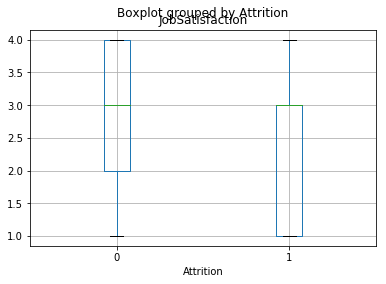

In [14]:
df.boxplot(column = 'JobSatisfaction',by = 'Attrition')

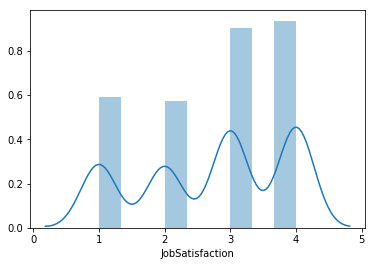

In [15]:
sns.distplot(df['JobSatisfaction'])

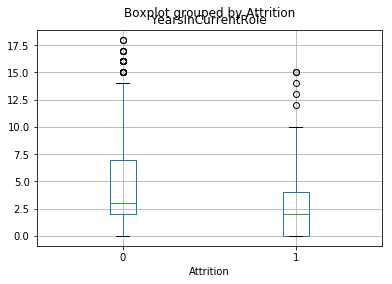

In [16]:
df.boxplot(column = 'YearsInCurrentRole',by = 'Attrition')

(array([1233.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         237.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

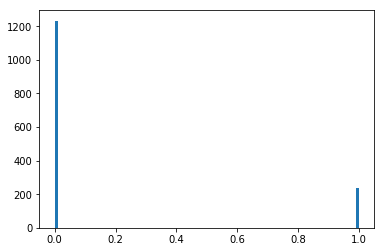

In [24]:
import matplotlib.pyplot as plt
plt.hist(df['Attrition'],bins = (100))

In [20]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(X_test))
print (auc(false_positive_rate, true_positive_rate))
# 0.857142857143
print (roc_auc_score(y_test, model.predict(X_test)))


0.5389703486477679
0.5389703486477679


In [22]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[491   4]
 [ 85   8]]


In [23]:
X_train

array([[44,  1,  3,  0,  2],
       [26,  1,  4,  1,  5],
       [39,  2,  4,  0,  4],
       ...,
       [43,  2,  4,  1,  9],
       [38,  1,  3,  1,  0],
       [40,  3,  2,  0,  0]], dtype=int64)